In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


## Importing needed packages and reading CSV file into a DF

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
haberman = pd.read_csv('haberman.csv')

## Describing the data

In [0]:
haberman.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [0]:
haberman.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

After reading the Haberman data into a Pandas dataframe *haberman*, we apply the head() function on it which outputs the values of the first 5 rows of a DF. 

The columns of the dataframe, which are the attributes of the dataset, are as follows :

*  **age** - Age of the patient (in years)
*  **year** - Year in which the operation was performed (in 1900s)
*  **nodes** - No. of positive axillary nodes detected for cancer diagnosis. 
*  **status** - 1 if the patient survived 5 years or more after the operation, 2 if not. 

In [0]:
haberman.shape

(306, 4)

The shape function, when called upon *haberman*, returns **306,4**, which signifies there are 306 rows of data and 4 columns as seen above. 

In [0]:
haberman.status.value_counts()

1    225
2     81
Name: status, dtype: int64

By using value_counts() on **status**, out of 306 patients, 225 of them survived for 5 years or more and the rest 81 of them did not. 

## Objective of EDA on Haberman dataset
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer. 

Throughout the EDA of this dataset, we expect to find correlation between different attributes of the dataset. Some of those correlations can be predicted, namely, the dependence of **status** on both **age** and **nodes**. 

If we consider **status** to be the dependent variable in this DF, we can also expect Machine Learning algorithms to predict out **status** values when we input **(age, year, nodes)** values which are not in this dataset already. 

## Univariate Analysis
### 1. Histograms and Probability Density Functions

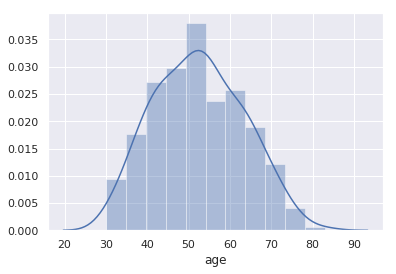

In [0]:
# How is the spread of age in the whole data?
sns.set();
ax = sns.distplot(haberman.age)

From the above histogram and PDF for **age**, we can notice that women **between 50--55 years** of age were the most operated upon. 

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


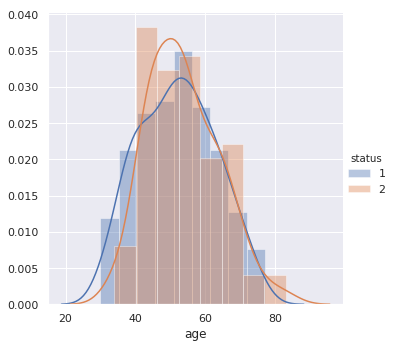

In [0]:
# How age is correlated with status of patient?
sns.FacetGrid(haberman, hue="status", size=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.show();

From this historgram where we change the parameter **hue** to the **status** column, we can see that women aged **between 53-55 years** proved to be the **most successful operations** and they survived for more than 5 years after the operation. Whereas, women of **40-43 years** of age **did not survive** till 5 years from the operation. 

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


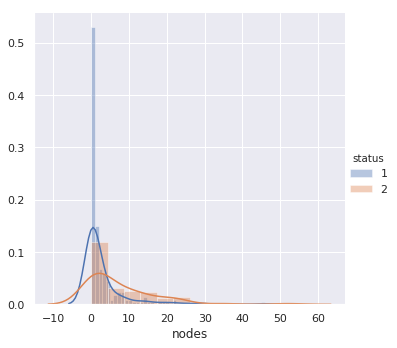

In [0]:
# How is the no. of axillary nodes related to the patient status?
sns.FacetGrid(haberman, hue="status", size=5) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.show();

The website of Medical News today says :

> Lymph nodes are responsible for filtering lymph fluid and detecting chemical changes that signal if an infection is present.
> Cancer cells can also get into the lymphatic system and get lodged in lymph nodes. When they are in the armpit, these filter points are called **axillary lymph nodes**.

> The axillary lymph nodes are usually the first set of lymph nodes where breast cancer will spread.
> And because the breast and armpit are close to each other, the lymph nodes are a common place where this type of cancer spreads.

And as we can see, in the above graph, the **most surviving chance** of patients remained when the **no. of nodes is 0** and reduced drastically as the nodes increased and reaching **zero survival chance** when **no. of nodes is around 15.**

But the same cannot be said for the status value of 2, i.e., the patient did not survive for more than 5 years. Even when the patient had only **one positive axillary node**, she **did not survive** and which continues till the maximum value of nodes, which is **62 nodes**. 


### 2. Cumulative Density Functions

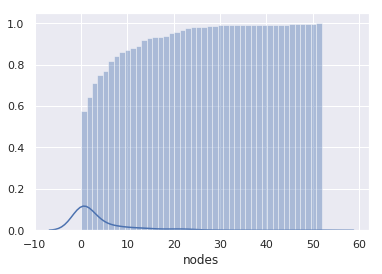

In [0]:
# CDF of no. of nodes in patient
sns.set();
ax = sns.distplot(haberman.nodes, hist_kws=dict(cumulative=True))

As we can see from the above CDF of no. of nodes, we can see that almost about **58% of the patients** had **no positive axillary nodes**, **77% of the patients** had **less than or equal to 5 nodes** and **85%** of them had **less than or equal to 10 nodes**. About **99% of the patients** had **less than or equal to 25 nodes** and that is where the CDF reaches its maxima. 

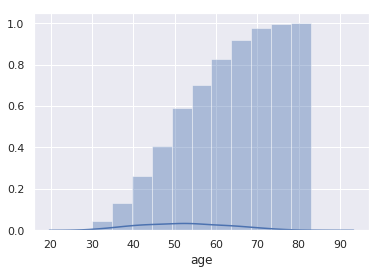

In [0]:
# How does age vary in case of the patients?
sns.set();
ax = sns.distplot(haberman.age, hist_kws=dict(cumulative=True))

From the above CDF of ages of patients, we notice that :

* A very less percentage of about 4% of the patients were below 30 years of age. 
* But about 50% of the patients were below 50 years of age. 
* The percentage rises to around 80% for women less than 60 years of age. 
* And almost all patients were below 75 years of age. 

### 3. Box Plots

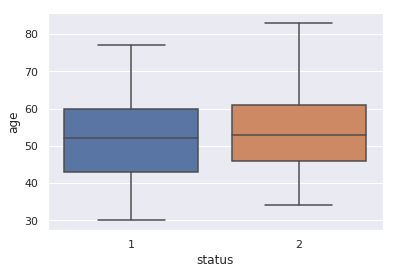

In [0]:
sns.boxplot(x='status',y='age',data=haberman)

From the above box plot of **age** v/s **status** of a patient, we see that :

* For status 1 - the patient went on to survive for more than 5 years, 
  * The lowest age for such a patient is 30 years. 
  * The highest age is around 77 years. 
  * 25th percentile value - 43 years, i.e., 25% percent of patients who went on to survive after the operation were below 43 years of age. 
  * 75th percentile value - 60 years, i.e., 75% percent of patients who went on to survive after the operation were below 60 years of age. 
  * Median value - 52 years, i.e., half of the patients who survived were below 52 years of age and the other half were above 52 years.
* For status 2 - the patient did not survive upto 5 years, 
  * The lowest age for such a patient is 34 years. 
  * The highest age is around 82 years. 
  * 25th percentile value - 46 years, i.e., 25% percent of patients who did not survive the operation were below 46 years of age. 
  * 75th percentile value - 61 years, i.e., 75% percent of patients who did not survive the operation were below 61 years of age. 
  * Median value - 53 years, i.e., half of the patients who did not survive after 5 years were below 53 years of age and the other half were above that.

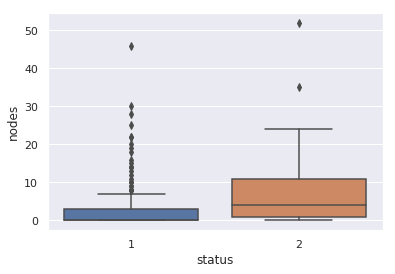

In [0]:
sns.boxplot(x='status',y='nodes',data=haberman)

From the above box plot of **nodes** v/s **status** of a patient, we see that :

* For the patients who survived more than 5 years,
  * The lowest value, the 25th percentile and the median of no. of nodes are all 0. 
  * The maximum no. of nodes for a patient who survived was 45, which is an outlier.. 
  * Though the data contains outliers (which are shown in the graph using black points outside the blue box), that does not ultimately affect the median and the percentile values of the plot. 
* For patients who did not survive more than 5 years,
  * Even a patient with no axillary node could not survive, which is the lowest point of the data. 
  * 25th percentile value - 1. Median - 4
  * 75 percent of the patients who did not survive had less than 11 nodes. 
  * The maximum no. of nodes a patient had was 52. 

### 4. Violin Plots
Violin plots combine the advantages of both box plots and PDFs. As we can see in the below diagrams, both the plots show the same conclusions as we had inferred, previously. The black line through the spine signifies the box plot and the region surrounding them signifies the PDFs of the y-axis. 

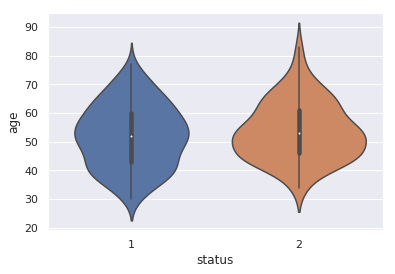

In [0]:
sns.violinplot(x='status',y='age',data=haberman, size=12)

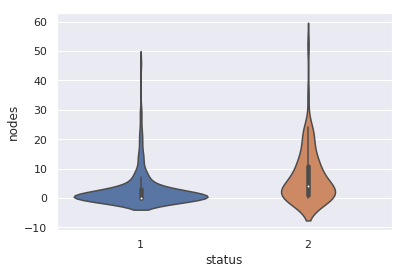

In [0]:
sns.violinplot(x='status',y='nodes',data=haberman, size=12)

## Bivariate Analysis
### 1. 2-D Scatter plots

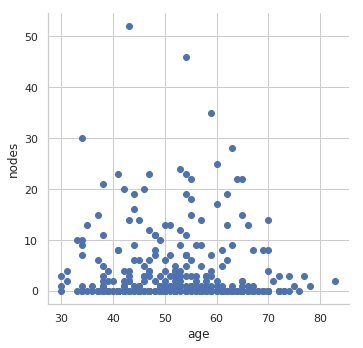

In [0]:
# How does age vary with no of nodes?
sns.set_style('whitegrid');
sns.FacetGrid(haberman, height=5) \
   .map(plt.scatter,'age','nodes') \
   .add_legend();
  

From the above age v nodes graph of patients, we can see that :

* Cases in which a woman is of almost any age and had zero positive nodes are very frequent. 
* Women with ages between 30-33 and more than 70 had no more than 5 positive nodes found. 
* Women from ages between 33-70 had anywhere between 0-20 positive nodes found in most of them. 
* The least aged woman of 30 years had zero node found in her and the most aged woman of around 83 years had 2 nodes found. 
* The most no. of nodes found was 52 in a 43yo woman. 


([<matplotlib.axis.XTick at 0x7efeb1ef87b8>,
 <a list of 2 Text xticklabel objects>)

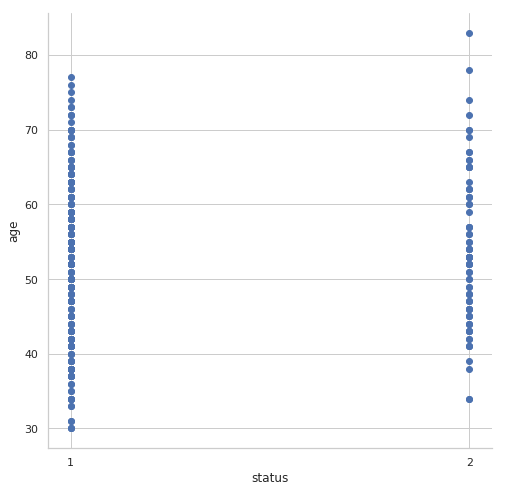

In [0]:
# How does status of the patient vary with increasing age?
sns.set_style('whitegrid');
sns.FacetGrid(haberman, height=7) \
   .map(plt.scatter,'status','age') \
   .add_legend();
plt.xticks([1,2])

In the above plot of **age** v **status** of patients, we conclude that :
* The least aged person who went on to survive for more than 5 years was 30 yo. And the least aged person who did not survive for 5 years after the operation was around 34 years of age. 
* The line with status = 1, which signifies women who survived after 5 years of the operation, has equally spaced scatter dots along the whole line and ends at 77, which was the highest age of a woman who did so. 
* But the line with status = 2, which shows women who did not survive after 5 years, becomes sparse after about 63 years, and ends at 78 years, which is the highest age of a woman who unforunately could not survive long after the operation. 

([<matplotlib.axis.XTick at 0x7efeb1dcd8d0>,
 <a list of 2 Text xticklabel objects>)

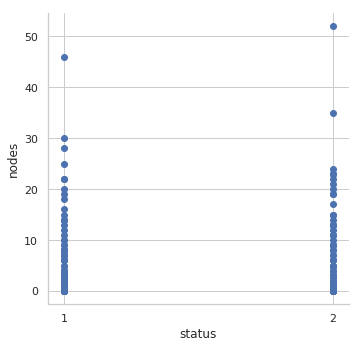

In [0]:
# How does status of the patient vary with varying no. of nodes?
sns.set_style('whitegrid');
sns.FacetGrid(haberman, height=5) \
   .map(plt.scatter,'status','nodes') \
   .add_legend();
plt.xticks([1,2])

In the above plot of **age** v **no. of nodes** of patients, we conclude that :

* Women with no. of nodes from 0-23 have cases who have survived or not survived, without any bias.
* Women with 24-30 positive nodes have always survived. 
* A woman who survived had the highest of 46 nodes. 
* A woman who had the highest no. of nodes at 52 did not survive. 

### 2. Pair Plots
Almost all the important plots that appear inside the pair plot have been previously sketched, with the exception of hue. In these pair plots, the extra information that we get along with the previous inferences is what is the status of the patients along with the basic information of the axes. All the other conclusion have already been talked about in the 2D scatter plots. 

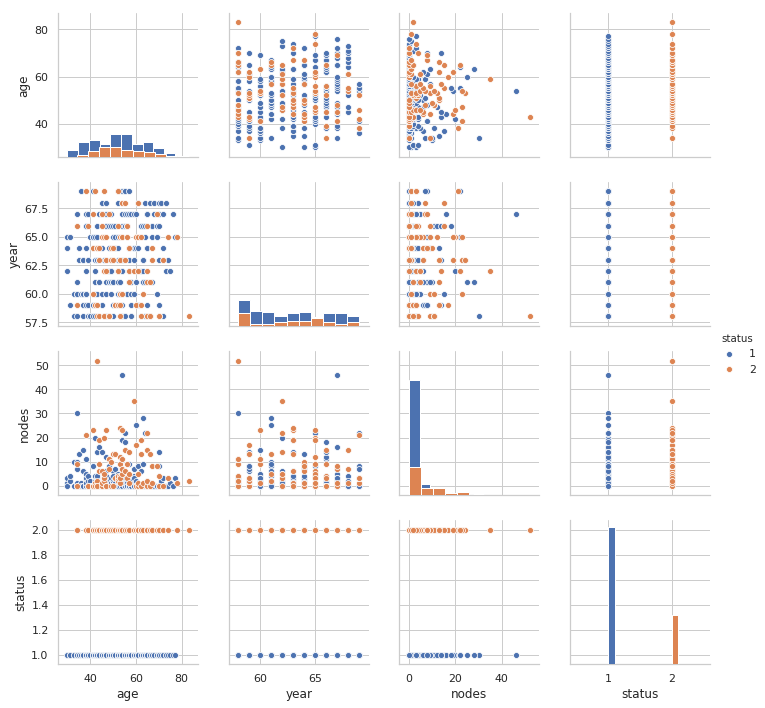

In [0]:
sns.pairplot(haberman, hue="status", height=2.5,diag_kind='hist')